# Chapter 7

# 7.2.2. Probability Distributions

Binomial Distribution

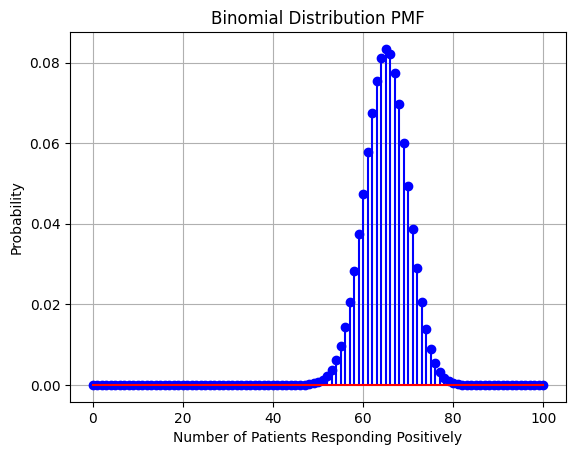

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
# modeling the number of patients responding to a treatment
n_patients = 100  # Total number of patients
p_success = 0.65  # Probability of a patient responding positively to the treatment
# Generate a binomial distribution
binomial_distribution = binom(n_patients, p_success)
# Plot the probability mass function (PMF)
x = np.arange(0, n_patients+1)
pmf = binomial_distribution.pmf(x)
plt.stem(x, pmf, linefmt='b-', markerfmt='bo', basefmt='r-') # Removed the use_line_collection argument
plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Patients Responding Positively')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

Example of a normal distribution: modeling systolic blood pressure readings

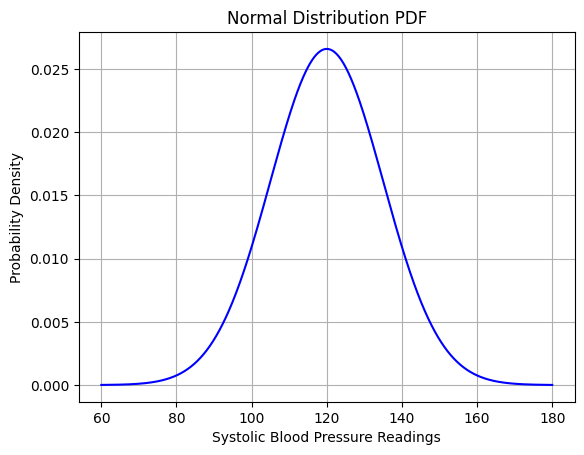

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_bp = 120  # Mean systolic blood pressure
std_dev_bp = 15  # Standard deviation of systolic blood pressure
# Generate a normal distribution
normal_distribution = norm(mean_bp, std_dev_bp)
# Plot the probability density function (PDF)
x = np.linspace(mean_bp - 4*std_dev_bp, mean_bp + 4*std_dev_bp, 1000)
pdf = normal_distribution.pdf(x)
plt.plot(x, pdf, 'b-')
plt.title('Normal Distribution PDF')
plt.xlabel('Systolic Blood Pressure Readings')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

Another example

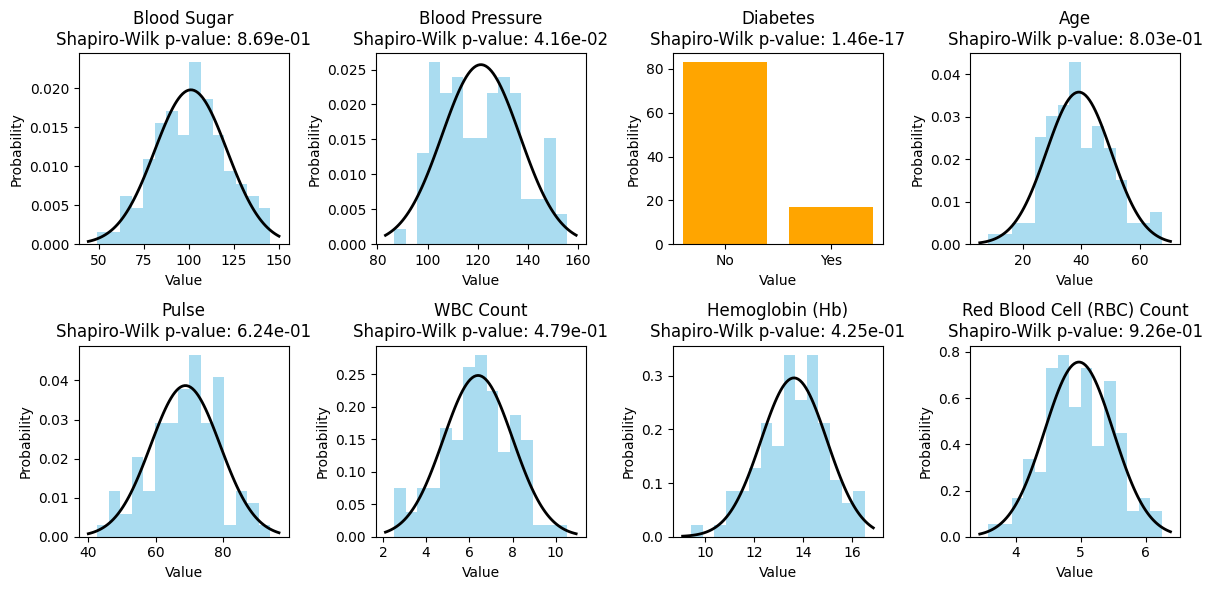

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, binom, shapiro
# For reproducibility
np.random.seed(0)
# Sample size
n_patients = 100
# Generating synthetic data for different health parameters
blood_sugar = np.random.normal(100, 20, n_patients)  # Normally distributed
blood_pressure = np.random.normal(120, 15, n_patients)  # Normally distributed
diabetes = np.random.binomial(1, 0.2, n_patients)  # Binomially distributed (20% have diabetes)
age = np.random.normal(40, 12, n_patients)  # Normally distributed
pulse = np.random.normal(70, 10, n_patients)  # Normally distributed
wbc_count = np.random.normal(6.5, 1.5, n_patients)  # Normally distributed
hb = np.random.normal(14, 1.5, n_patients)  # Normally distributed
rbc = np.random.normal(5, 0.5, n_patients)  # Normally distributed
# Collecting all parameters in a dictionary for ease of iteration
parameters = {
    'Blood Sugar': blood_sugar,
    'Blood Pressure': blood_pressure,
    'Diabetes': diabetes,
    'Age': age,
    'Pulse': pulse,
    'WBC Count': wbc_count,
    'Hemoglobin (Hb)': hb,
    'Red Blood Cell (RBC) Count': rbc
}
# Set up the figure and axes for multiple subplots
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()
# Iterate through the parameters and plot each distribution
for i, (param_name, values) in enumerate(parameters.items()):
    # Perform Shapiro-Wilk test to assess the distribution
    shapiro_test = shapiro(values)
    # Check if the distribution is binomial (for diabetes)
    if param_name == 'Diabetes':
        # Use bar plot for binomial distribution
        axs[i].bar(['No', 'Yes'], [n_patients - sum(values), sum(values)], color='orange')
    else:
        # Use histogram for normal distribution
        axs[i].hist(values, bins=15, density=True, color='skyblue', alpha=0.7)
        # Fit a normal distribution curve
        mu, std = norm.fit(values)
        xmin, xmax = axs[i].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        axs[i].plot(x, p, 'k', linewidth=2)    
    axs[i].title.set_text(f'{param_name}\nShapiro-Wilk p-value: {shapiro_test.pvalue:.2e}')    
    # Set common labels
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Probability')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()